In [264]:
import numpy as np
import matplotlib.pyplot as plt

In [265]:
#assumes points are connected to neighbours
def discrete_laplacian(X):
    dim = X.shape[0]
    arr = np.zeros((dim, dim))
    for i in range(dim):
        l_neigh = (i-1)%dim
        r_neigh = (i+1)%dim
        arr[i][i] = 1 #degree matrix
        arr[i][l_neigh] = -0.5 #adjecency
        arr[i][r_neigh] = -0.5
    return arr

def project_eigen(X, eigenvector):
    #reconstruction
    x_pr = np.dot(np.transpose(eigenvector), X)
    eig = eigenvector * x_pr
    reconstr_X = np.reshape(eig, (eig.shape[0],1)) #projection of X along the eigenvector
    return reconstr_X

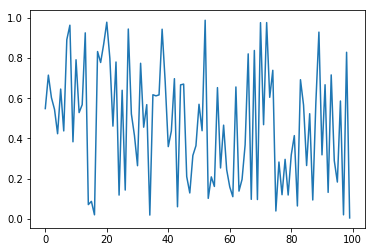

In [270]:
#init random signal
np.random.seed(0)
X = np.random.rand(100, 1)

#define smoothing operator
L = discrete_laplacian(X)
S = np.identity(X.shape[0]) - 0.5*L #smoothing operator\

plt.plot(X)

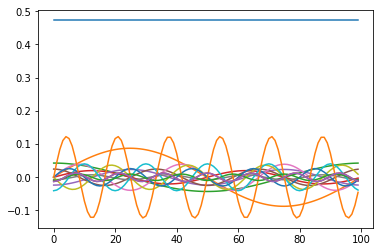

In [269]:
eigenvalues, eigenvectors = np.linalg.eig(S)

#sort eigenvectors by eigenvalues
eig_sort = np.sort(eigenvalues)
eig_ind = []
for i in range(len(eig_sort)):
    eig_ind.append(np.where(eigenvalues==eig_sort[-i-1])[0][0])

#plot projections of X onto fist N eigenvectors of the laplacian smoothing operator
for i in range(0, 15):
    plt.plot( project_eigen(X, eigenvectors[:, eig_ind[i]]))
plt.show()